In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("./train.csv")

In [3]:
data.head()

,IP,Country,class
0,1.10.195.126,TH,normal
1,1.1.217.211,TH,normal
2,1.115.198.107,JP,anomaly
3,1.121.152.143,AU,normal
4,1.123.135.213,AU,normal


In [4]:
data.count()

IP         19926
Country    16721
class      19926
dtype: int64

In [5]:
data.isnull().sum()

IP            0
Country    3205
class         0
dtype: int64

In [6]:
data = data[data['Country'].notna()]

In [7]:
data.isnull().sum()

IP         0
Country    0
class      0
dtype: int64

In [8]:
data.count()

IP         16721
Country    16721
class      16721
dtype: int64

In [9]:
data.nunique()

IP         15638
Country      165
class          2
dtype: int64

In [10]:
values = [len(data.loc[data['class'] == "normal"]), len(data.loc[data['class'] == "anomaly"])]
names = ["Normal IPs", "Anomalistic IPs"]

<BarContainer object of 2 artists>

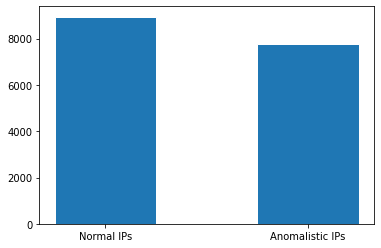

In [11]:
plt.bar(names, values, width=0.5, edgecolor="white", linewidth=1)

In [12]:
y = data['class']
y.head()

0     normal
1     normal
2    anomaly
3     normal
4     normal
Name: class, dtype: object

In [13]:
X = data.drop(['class'], axis=1)
X.head()

,IP,Country
0,1.10.195.126,TH
1,1.1.217.211,TH
2,1.115.198.107,JP
3,1.121.152.143,AU
4,1.123.135.213,AU


In [14]:
categ = ['IP', 'Country']
le = LabelEncoder()
X[categ] = X[categ].apply(le.fit_transform)
X.head()

,IP,Country
0,1,147
1,0,147
2,2,81
3,3,9
4,4,9


In [15]:
y = le.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
predictions = model.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  2221
False Positive(FP) =  1960
True Negative(TN)  =  0
False Negative(FN) =  0
Accuracy of the binary classification = 0.531


In [20]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']